# Optimal Location to open an Indian Restaurant in New York City 
"London is satisfied, Paris is resigned, but **New York** is always hopeful. Always it believes that something good is about to come off, and it must hurry to meet it.”

## Introduction  

As per recent statistics, there are over 30,000 different cuisine restaurants in alone NEW YORK City. It would take years for one person to visit all the restaurants in NYC. With that being said, the restaurant business sounds one of the most lucrative business industry in New York City as the city serves home for so many people belonging to different race and culture.  
Considering New Yorks's diversity and ethnicity it is evident that starting a restaurant business would earn you more money comparatively than most of the other businesses. This project serves as one of the guide to start an Indian restaurant in New York City by performing demgraphic analysis on various venues in different neighborhood of the city. 

## Data Source

The NYC Population and demographic data was collected from 
1. https://en.wikipedia.org/wiki/New_York_City
2. https://en.wikipedia.org/wiki/Demographics_of_New_York_City
3. https://cocl.us/new_york_dataset

Various Python Librarires such as requests, BeautifulSoup, Pandas were used to extract this data. 
Foursquare API was used to analyze the various neighborhoods and the existing indian restaurants in those neighborhoods  along with the reviews and suggestion from different users. 

#### Lets being by Importing all the required Libraries we will need to perform the analysis.

In [1]:
import pandas as pd
import numpy as np
import requests # This Library handles requests
import random # This Library generate random numbers

# We need to install a module to convert a address into latitude and Longitude.
!pip install geopy
from geopy.geocoders import Nominatim

# Libraries to diplay images
from IPython.display import Image
from IPython.core.display import HTML
from IPython.display import display_html

# Libraries required to convert JSON file into Pandas Dataframe
from pandas import json_normalize

# Library to plot the result
!pip install folium==0.5.0
import folium 

from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors


print('Libraries Imported Successfully')


Libraries Imported Successfully


In [2]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [7]:
new_york_data = get_new_york_data()
new_york_data.shape

(306, 4)

In [8]:
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


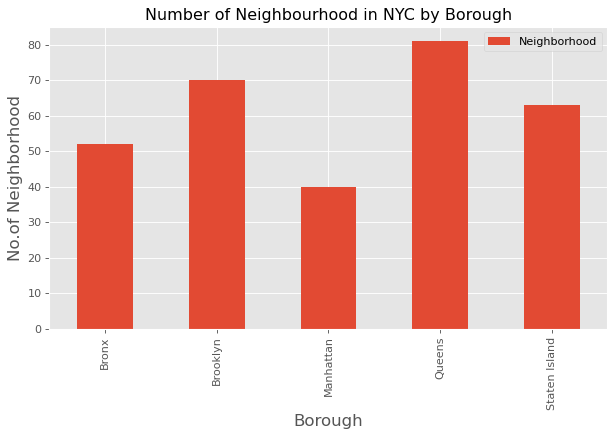

In [9]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 80)
# title
plt.title('Number of Neighbourhood in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
plt.show()

The above analysis shows that Queens is the most densely populated borough of NYC with approximately 80 neighborhoods, followed by Brooklyn. 

#### Lets define the Foursquare API to categorize and find the number of indian restaurants in each neighbourhoods of NYC.

In [10]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    locatidn = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [16]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = '113FIFR4FM1JZNPCCTC0R3CJJ1IAJ2RP1WJFRENYQD3QOET0'
    CLIENT_SECRET = 'PQA5P0ON4JOGCX5HN4KPRRRPVYB0N42V41HJ2Q2I53M1QLLJ'
    VERSION = 20212602
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [17]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
indian_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    indian_resturants=venues[venues['Category']=='Indian Restaurant']   
    print('(',count,'/',len(new_york_data),')','Indian Resturants in '+Neighborhood+', '+Borough+':'+str(len(indian_resturants)))
    for resturant_detail in indian_resturants.values.tolist():
        id, name , category=resturant_detail
        indian_rest_ny = indian_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Indian Resturants in Wakefield, Bronx:0
( 2 / 306 ) Indian Resturants in Co-op City, Bronx:0
( 3 / 306 ) Indian Resturants in Eastchester, Bronx:0
( 4 / 306 ) Indian Resturants in Fieldston, Bronx:0
( 5 / 306 ) Indian Resturants in Riverdale, Bronx:0
( 6 / 306 ) Indian Resturants in Kingsbridge, Bronx:0
( 7 / 306 ) Indian Resturants in Marble Hill, Manhattan:0
( 8 / 306 ) Indian Resturants in Woodlawn, Bronx:1
( 9 / 306 ) Indian Resturants in Norwood, Bronx:0
( 10 / 306 ) Indian Resturants in Williamsbridge, Bronx:0
( 11 / 306 ) Indian Resturants in Baychester, Bronx:0
( 12 / 306 ) Indian Resturants in Pelham Parkway, Bronx:0
( 13 / 306 ) Indian Resturants in City Island, Bronx:0
( 14 / 306 ) Indian Resturants in Bedford Park, Bronx:0
( 15 / 306 ) Indian Resturants in University Heights, Bronx:0
( 16 / 306 ) Indian Resturants in Morris Heights, Bronx:0
( 17 / 306 ) Indian Resturants in Fordham, Bronx:0
( 18 / 306 ) Indian Resturants in East Tremont, Bronx:0
( 19 / 306 ) Ind

In [18]:
indian_rest_ny.shape

(153, 4)

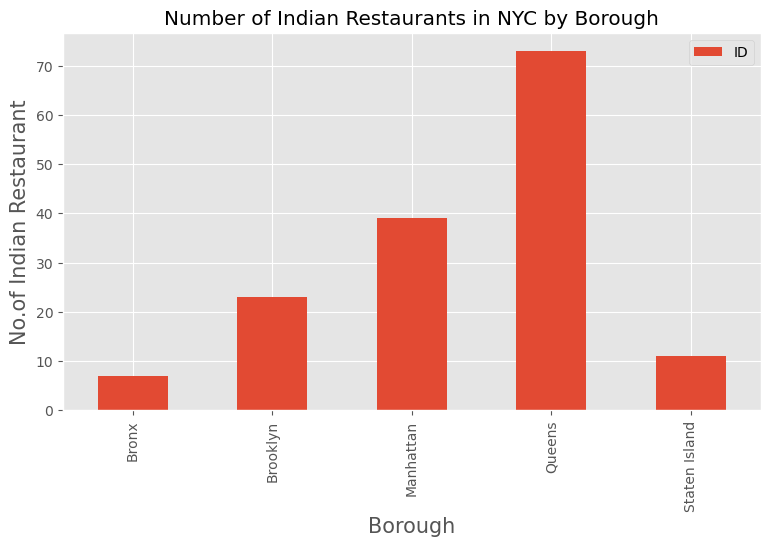

In [19]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Indian Restaurants in NYC by Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Indian Restaurant', fontsize=15)
#giving a bar plot
indian_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()


**The Above Analysis shows that there are total 153 Indian Restaurants in NYC and Queens has the highest number of Indian Restaurants.**

### Lets find out the distribution of indian restaurants in queens according to it borough.

In [28]:
indian_rest_ny[indian_rest_ny['Borough']=='Queens']

,Borough,Neighborhood,ID,Name
54,Queens,Astoria,4aa56c81f964a5204e4820e3,Seva Indian Cuisine
55,Queens,Astoria,5d8d9c5e0a2ffc0008f28855,The Gully
56,Queens,Astoria,562035d9498e2abb4137c2c7,Yaar Indian Restaurant
57,Queens,Woodside,4afdcf29f964a520162b22e3,Rajbhog Sweets
58,Queens,Woodside,4c7060e734443704ca0e245f,Kababish
...,...,...,...,...
138,Queens,Astoria Heights,4f5c0b29e4b04e12661cac80,Star Light Grill Restaurant
139,Queens,Astoria Heights,4c2e8df2213c2d7f94742f5d,Tikka Grill
146,Queens,Blissville,5b931ea69d7468002c3b1382,Adda
150,Queens,Queensbridge,50a287a7e4b0033f830f06db,Raj's Indian Kitchen


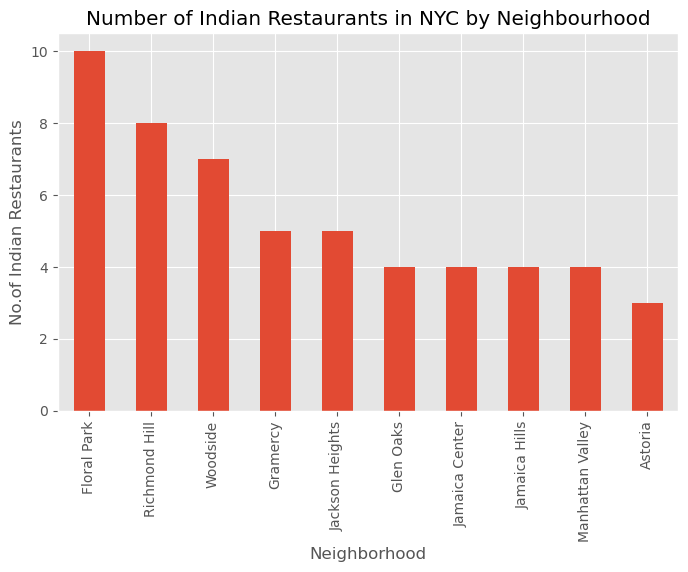

In [34]:
from matplotlib import pyplot as plt


plt.figure(figsize=(8,5), dpi = 100)
plt.title('Number of Indian Restaurants in NYC by Neighbourhood')
plt.xlabel('Neighborhood', fontsize = 12)
plt.ylabel('No.of Indian Restaurants', fontsize=12)
indian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar')
plt.show()


The above analysis shows that Queens alone have 73 Indian Restaurants. Floral Park in Queens have the maximum of Indian Restaurant with the count of approximately 10. 

#### For further analaysis it is very important to know peoples reviews on this restaurants. Hence, using Foursquare API we'll determine the likes tips and ratings for all the restaurants in NYC

In [22]:
def get_venue_details(venue_id):
        
    CLIENT_ID = '113FIFR4FM1JZNPCCTC0R3CJJ1IAJ2RP1WJFRENYQD3QOET0'
    CLIENT_SECRET = 'PQA5P0ON4JOGCX5HN4KPRRRPVYB0N42V41HJ2Q2I53M1QLLJ'
    VERSION = 20212602
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [23]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row

    # prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
indian_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in indian_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except (IndexError, KeyError) as e:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(indian_rest_ny),')','processed')
    indian_rest_stats_ny = indian_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID        Name  Likes  Rating  Tips
0  4c0448d9310fc9b6bf1dc761  Curry Spot      5     7.3    10
( 1 / 153 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     5.9     2
( 2 / 153 ) processed
                         ID                  Name  Likes  Rating  Tips
0  4c04544df423a593ac83d116  Cumin Indian Cuisine     13     6.2     9
( 3 / 153 ) processed
                         ID         Name  Likes  Rating  Tips
0  551b7f75498e86c00a0ed2e1  Hungry Bird      8     7.0     3
( 4 / 153 ) processed
                         ID                         Name  Likes  Rating  Tips
0  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     5.9     2
( 5 / 153 ) processed
Empty DataFrame
Columns: [ID, Name, Likes, Rating, Tips]
Index: []
No data available for id= 55dfa36a498e164ef19bef7b
( 6 / 153 ) processed
                         ID          Name  Likes  

In [24]:
indian_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.3,10
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.2,9
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,7.0,3
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2


In [30]:
#Savinf the data in csv file.
indian_rest_stats_ny.to_csv('indian_rest_stats_ny.csv', index=False)

In [31]:
#Reading the saved Data
indian_rest_stats_ny_csv=pd.read_csv('indian_rest_stats_ny.csv')

In [32]:
indian_rest_stats_ny_csv.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Bronx,Woodlawn,4c0448d9310fc9b6bf1dc761,Curry Spot,5,7.3,10
1,Bronx,Parkchester,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2
2,Bronx,Spuyten Duyvil,4c04544df423a593ac83d116,Cumin Indian Cuisine,13,6.2,9
3,Bronx,Concourse,551b7f75498e86c00a0ed2e1,Hungry Bird,8,7.0,3
4,Bronx,Unionport,4c194631838020a13e78e561,Melanies Roti Bar And Grill,3,5.9,2


In [33]:
indian_rest_stats_ny['Likes']=indian_rest_stats_ny['Likes'].astype('float64') #Convert likes to float

In [35]:
indian_rest_stats_ny['Tips']=indian_rest_stats_ny['Tips'].astype('float64') #Convert tips to float

In [36]:
indian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       153 non-null    object 
 1   Neighborhood  153 non-null    object 
 2   ID            153 non-null    object 
 3   Name          153 non-null    object 
 4   Likes         153 non-null    float64
 5   Rating        153 non-null    float64
 6   Tips          153 non-null    float64
dtypes: float64(3), object(4)
memory usage: 8.5+ KB


In [37]:
#Restaurant with Maximum Likes
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                834
Rating                               8.6
Tips                                 256
Name: 37, dtype: object

In [38]:
# Restaurants with maximum Rating
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                     Tribeca
ID              4bbb9dbded7776b0e1ad3e51
Name                    Tamarind TriBeCa
Likes                                601
Rating                               9.1
Tips                                 151
Name: 40, dtype: object

In [39]:
# Restaurants with maximum Tips
indian_rest_stats_ny.iloc[indian_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                     Midtown
ID              49d91c12f964a520015e1fe3
Name               The Kati Roll Company
Likes                                834
Rating                               8.6
Tips                                 256
Name: 37, dtype: object

In [41]:
#Calculating the average rating for the Indian Restaurants in each neighbourhood.
ny_neighborhood_stats=indian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
71,Tribeca,9.1
55,Prospect Heights,8.9
76,West Village,8.8
13,Chelsea,8.8
22,East Village,8.7
56,Prospect Lefferts Gardens,8.7
47,Midtown,8.6
15,Clinton Hill,8.5
29,Fort Greene,8.5
63,Roosevelt Island,8.4


In [42]:
#Calculating the Avaerage Rating for the Indian Restaurants in each Boroughs
ny_borough_stats=indian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Brooklyn,6.056522
2,Manhattan,5.476923
0,Bronx,4.614286
3,Queens,0.000000
4,Staten Island,0.000000


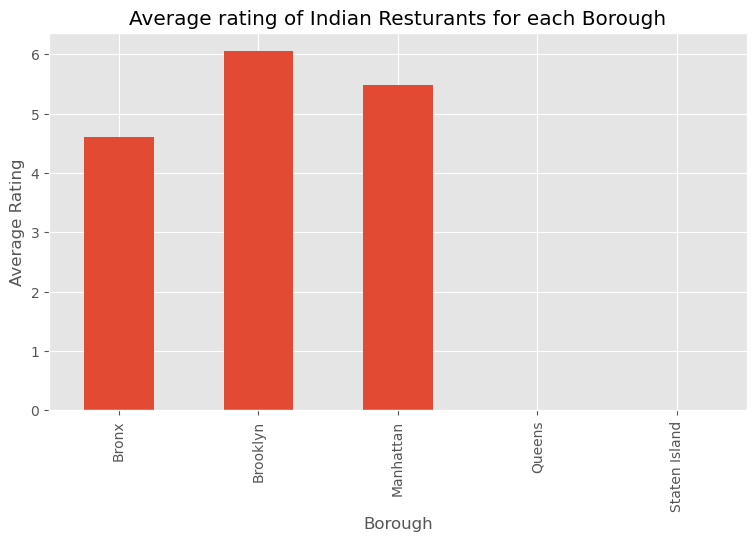

In [45]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Indian Resturants for each Borough')
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('Average Rating', fontsize=12)
indian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
plt.show()

#### Lets Define the Restaurants with average rating of 8.5 and above in all the neighborhoods on NYC

In [47]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.5]
ny_neighborhood_stats

,Neighborhood,Average Rating
13,Chelsea,8.8
15,Clinton Hill,8.5
22,East Village,8.7
29,Fort Greene,8.5
47,Midtown,8.6
55,Prospect Heights,8.9
56,Prospect Lefferts Gardens,8.7
71,Tribeca,9.1
76,West Village,8.8


In [48]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,new_york_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Borough,Neighborhood,Latitude,Longitude,Average Rating
8,Manhattan,Tribeca,40.721522,-74.010683,9.1
6,Brooklyn,Prospect Heights,40.676822,-73.964859,8.9
0,Manhattan,Chelsea,40.744035,-74.003116,8.8
1,Staten Island,Chelsea,40.594726,-74.189560,8.8
9,Manhattan,West Village,40.734434,-74.006180,8.8
3,Manhattan,East Village,40.727847,-73.982226,8.7
7,Brooklyn,Prospect Lefferts Gardens,40.658420,-73.954899,8.7
5,Manhattan,Midtown,40.754691,-73.981669,8.6
2,Brooklyn,Clinton Hill,40.693229,-73.967843,8.5
4,Brooklyn,Fort Greene,40.688527,-73.972906,8.5


In [49]:
ny_map = folium.Map(location=(40.693943, -73.985880), zoom_start=12)

In [50]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [51]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [52]:
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

The above map shows that the avarage ratings of Indian Restuarants in more in Brooklyn and Manhattan. Thus, opening an Indian Restuarant in either of this Borough would not be a bad deal. 

**Midtown Manhattan** and **East VIllage** could be the most optimal location to opena a new restaurants in NYC as its one of the hotspot for tourist.